In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
up=files.upload()


Saving students_100.xlsx to students_100.xlsx


In [ ]:

data=pd.read_excel("students_100.xlsx")
data.head()


,Student_ID,Name,Marks(%),CGPA,Placement_Status
0,1,Meera,93,8.98,Placed
1,2,Varun,81,7.48,Not Placed
2,3,Riya,100,9.32,Placed
3,4,Varun,65,5.75,Not Placed
4,5,Rohit,93,8.49,Placed


In [ ]:
print(data.columns)


Index(['Student_ID', 'Name', 'Marks(%)', 'CGPA', 'Placement_Status'], dtype='object')


In [ ]:
data['Placement_Status'] = (
    data['Placement_Status']
    .astype(str)
    .str.strip()
    .replace({'Placed': 1, 'Not Placed': 0})
)


data.head()

,Student_ID,Name,Marks(%),CGPA,Placement_Status
0,1,Meera,93,8.98,1
1,2,Varun,81,7.48,0
2,3,Riya,100,9.32,1
3,4,Varun,65,5.75,0
4,5,Rohit,93,8.49,1


In [ ]:
x = data.iloc[:, 2:4]   # features
y= data.iloc[:, -1]    # label


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)



In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)
y_p=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
#print(accuracy_score())
print(accuracy_score(y_test,y_p))
print(model.score(x_test,y_test))
cm=confusion_matrix(y_test,y_p)




1.0
1.0


<Figure size 600x600 with 0 Axes>

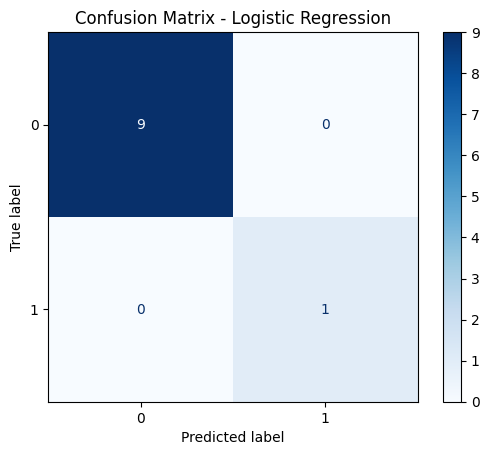

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

To reuse the model, you first need to load it back into memory. You'll also need to load the `StandardScaler` if you want to make predictions on new raw data, as the model expects scaled input.

In [ ]:
import joblib
import pandas as pd

# Load the saved model
loaded_model = joblib.load('logistic_regression_model.pkl')

print("Model loaded successfully!")

# You would typically save and load the StandardScaler as well to ensure consistent preprocessing.
# For demonstration, let's assume 'sc' (StandardScaler) from previous steps is still available
# or you would load a saved scaler object.
# Example if you saved the scaler: loaded_scaler = joblib.load('standard_scaler.pkl')


Model loaded successfully!


Let's provide some new data to the model for prediction.

In [ ]:
import joblib
import pandas as pd

# Load the saved model (this line was missing or not executed previously)
loaded_model = joblib.load('logistic_regression_model.pkl')

# Define new student data (e.g., Marks=88, CGPA=8.1)
# You can change these values to test with different scenarios
new_student_data_2 = pd.DataFrame([{'Marks(%)': 88, 'CGPA': 8.1}])
dataset_3=pd.DataFrame([{'Marks(%)':99,'CGPA':9.2}])
# Scale the new data using the SAME scaler object 'sc' used for training
scaled_new_student_data_2 = sc.transform(new_student_data_2)
scaled_dataset_3=sc.transform(dataset_3)

# Make a prediction using the loaded model
prediction_2 = loaded_model.predict(scaled_new_student_data_2)
prediction_3=loaded_model.predict(scaled_dataset_3)
print(prediction_3)

# Interpret the prediction
placement_status_2 = 'Placed' if prediction_2[0] == 1 else 'Not Placed'
placement_status_3='Placed' if prediction_3[0]==1 else 'Not Placed'

# Print the prediction
print(f"New student data: {new_student_data_2.to_dict('records')[0]}")

print(f"New student data: {dataset_3.to_dict('records')[0]}")
print(f"Predicted Placement Status: {placement_status_2}")
print(f"Predicted Placement Status: {placement_status_3}")


['1']
New student data: {'Marks(%)': 88, 'CGPA': 8.1}
New student data: {'Marks(%)': 99, 'CGPA': 9.2}
Predicted Placement Status: Not Placed
Predicted Placement Status: Not Placed
